In [1]:
# Required imports

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
#set the file extension for images to be saved as
file_ext = 'png'  #'pdf'

In [3]:
# Read in data as .csv files

#ppo
ppo_log = pd.read_csv(filepath_or_buffer= os.getcwd() + "/training_log_SpaceInvaders.csv", header= None, index_col= None, names= ["Steps", "Score", "Duration"])

#dqn
dqn_log = pd.read_csv(filepath_or_buffer= os.getcwd() + "/dqn_training.csv", header= None, index_col= None, names= ["Episodes", "Score"])
dqn_eval = pd.read_csv(filepath_or_buffer= os.getcwd() + "/dqn_eval.csv", header= None, index_col= None, names= ["Episodes", "Score"])

#rand
rand_log = pd.read_csv(filepath_or_buffer= os.getcwd() + "/training_log_SpaceInvaders_rand.csv", header= None, index_col= None, names= ["Steps", "Score", "Duration"])

#GA
ga_log = pd.read_csv(filepath_or_buffer= os.getcwd() + "/fitness_history.csv", header= None, index_col= None, names= ["Best", "Average"], sep=' ')
ga_np = ga_log.to_numpy()[:14,:]

In [4]:
# Have the epoch numver continually incrementing, remove the resets

addition = 0
diff = 0
for i in range(len(ppo_log) - 1):
    if((ppo_log.iloc[(i + 1),0] - ppo_log.iloc[i,0]) < 0):
        diff = ppo_log.iloc[i,0]

    ppo_log.iloc[i,0] += addition
    addition += diff
    diff = 0
ppo_log.iloc[(len(ppo_log) - 1),0] += addition

ppo_np = ppo_log.to_numpy()

In [5]:
# Calculate the rolling average in blocks of 50 for ppo

chunks = np.array_split(ppo_np, 50)
ppo_chunked = np.zeros((5, len(chunks)))


for i in range(len(chunks)):
    ppo_chunked[:,i] = np.append(chunks[i][-1,0], np.append(np.mean(chunks[i][:,1:], 0), np.std(chunks[i][:,1:], 0)) )
ppo_chunked = np.transpose(ppo_chunked)    

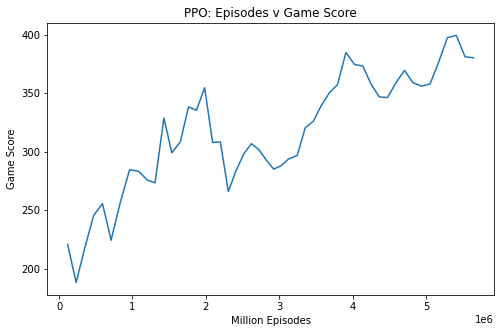

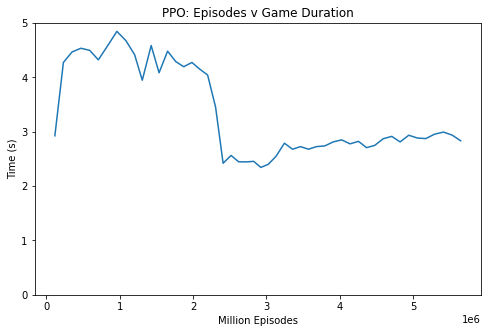

In [6]:
# Plotting the Score for ppo

fig1, ax1 = plt.subplots(1, figsize = (8,5))
ax1.errorbar(ppo_chunked[:,0], ppo_chunked[:,1], xerr=0, yerr=0, fmt='-')#
#ax1.set_ylim([0, 450])

ax1.set_xlabel('Million Episodes')
ax1.set_ylabel('Game Score')
ax1.set_title('PPO: Episodes v Game Score')

fig1.savefig('images/{0}.{1}'.format('ppo_full_score',file_ext))

fig2, ax2 = plt.subplots(1, figsize = (8,5))
plt.plot(ppo_chunked[:,0], ppo_chunked[:,2])

ax2.set_ylim([0, 5])
ax2.set_xlabel('Million Episodes')
ax2.set_ylabel('Time (s)')
ax2.set_title('PPO: Episodes v Game Duration')

fig2.savefig('images/{0}.{1}'.format('ppo_full_dur',file_ext))

plt.show()

In [7]:
ppo_cut = ppo_np[:3400, :]
num_chunks = 67

chunks = np.array_split(ppo_cut, num_chunks)
ppo_cut_chunked = np.zeros((3, len(chunks)))

#ppo in 50 segments
for i in range(len(chunks)):
    ppo_cut_chunked[:,i] = np.append(chunks[i][-1,0], np.mean(chunks[i][:,1:], 0) )
ppo_cut_chunked = np.transpose(ppo_cut_chunked)    

#rand in 50 segments
rand_numpy = rand_log.to_numpy()
rand_chunks = np.array_split(rand_numpy, num_chunks)
rand_chunked = np.zeros((3, len(chunks)))

for i in range(len(chunks)):
    rand_chunked[:,i] = np.append(rand_chunks[i][-1,0], np.mean(rand_chunks[i][:,1:], 0) )
rand_chunked = np.transpose(rand_chunked)   


#dqn is already in chunks
dqn_numpy = dqn_log.to_numpy()


In [8]:
len(ppo_cut_chunked[:,2])

67

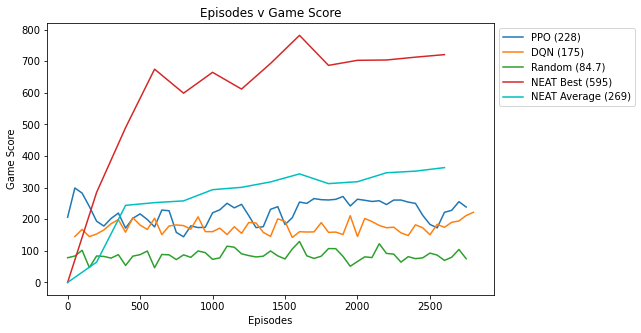

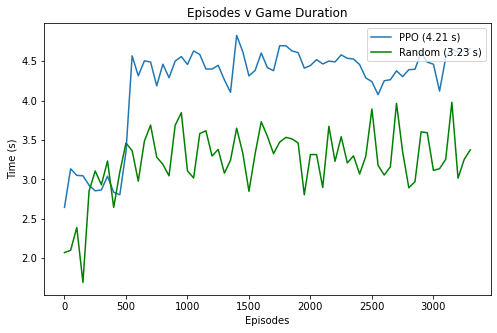

In [25]:
# Plotting score against number of episodes

fig3, ax3 = plt.subplots(1, figsize = (8,5))

plt.plot(np.arange(0,2800,50), ppo_cut_chunked[:56,1], label = 'PPO ({0:.3g})'.format(np.mean(ppo_cut_chunked[:,1])))
plt.plot(dqn_numpy[:56,0], dqn_numpy[:56,1], label = 'DQN ({0:.3g})'.format(np.mean(dqn_numpy[:,1])))
plt.plot(np.arange(0,2800,50), rand_chunked[:56,1], label = 'Random ({0:.3g})'.format(np.mean(rand_chunked[:,1])))

plt.plot(np.arange(0,2800,200), ga_np[:,0], label='NEAT Best ({0:.3g})'.format(np.mean(ga_np[:,0])), color='tab:red')
plt.plot(np.arange(0,2800,200), ga_np[:,1], label='NEAT Average ({0:.3g})'.format(np.mean(ga_np[:,1])), color='c')


#ax3.set_ylim([0, 325])
#ax3.set_xlim([0, 3400])
ax3.set_xlabel('Episodes')
ax3.set_ylabel('Game Score')
ax3.set_title('Episodes v Game Score')

plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

fig3.savefig('images/{0}.{1}'.format('comp_score',file_ext))


# Plotting score against number of episodes

fig4, ax4 = plt.subplots(1, figsize = (8,5))

plt.plot(np.arange(0,3350,50), ppo_cut_chunked[:,2], label= 'PPO ({0:.3g} s)'.format(np.mean(ppo_cut_chunked[:,2])))
#plt.plot(dqn_numpy[:,0], dqn_numpy[:,1], label = "DQN")
plt.plot(np.arange(0,3350,50), rand_chunked[:,2], label = 'Random ({0:.3g} s)'.format(np.mean(rand_chunked[:,2])), color='g')
#plt.plot(dqn_numpy[:,0], dqn_numpy[:,1], label = "DQN")

#ax4.set_ylim([0, 5])
#ax3.set_xlim([0, 3400])
ax4.set_xlabel('Episodes')
ax4.set_ylabel('Time (s)')
ax4.set_title('Episodes v Game Duration')

plt.legend(loc='upper right')
plt.show()

fig4.savefig('images/{0}.{1}'.format('comp_duration',file_ext))

In [10]:
len(np.arange(0,2800,50))

56

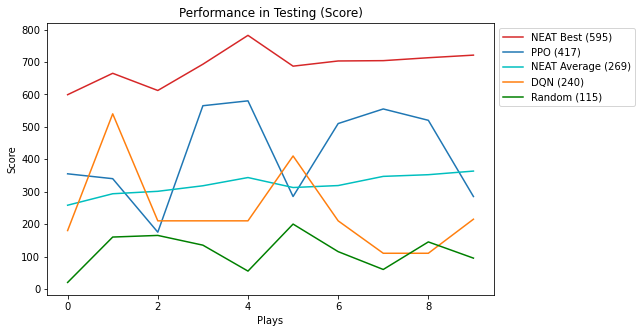

In [11]:
ppo_np[-10:,1]
# Plotting the performance in evaluaiton

fig5, ax5 = plt.subplots(1, figsize = (8,5))

plt.plot(ga_np[-10:,0], label='NEAT Best ({0:.3g})'.format(np.mean(ga_np[:,0])), color='tab:red')
plt.plot(ppo_np[-10:,1], label= 'PPO ({0:.3g})'.format(np.mean(ppo_np[-10:,1])), color='tab:blue')
plt.plot(ga_np[-10:,1], label='NEAT Average ({0:.3g})'.format(np.mean(ga_np[:,1])), color='c')

plt.plot(dqn_eval.to_numpy()[:,1], label= 'DQN ({0:.3g})'.format(np.mean(dqn_eval.to_numpy()[:,1])), color='tab:orange')
plt.plot(rand_numpy[-10:,1], label= 'Random ({0:.3g})'.format(np.mean(rand_numpy[-10:,1])), color='g')

#Neat

#plt.plot(np.arange(0,3350,50), rand_chunked[:,2], label = 'Random ({0:.3g})'.format(np.mean(rand_chunked[:,2])))
#plt.plot(dqn_numpy[:,0], dqn_numpy[:,1], label = "DQN")


#ax3.set_xlim([0, 3400])
ax5.set_xlabel('Plays')
ax5.set_ylabel('Score')
ax5.set_title('Performance in Testing (Score)')

#ax5.set_ylim([0, 1200])
#ax5.set_xlim([0, 12])

plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

fig5.savefig('images/{0}.{1}'.format('eval_score',file_ext))

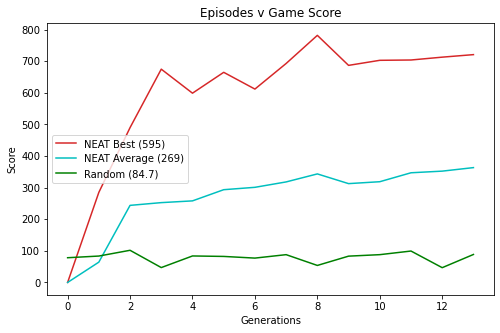

In [12]:
fig6, ax6 = plt.subplots(1, figsize = (8,5))

plt.plot(ga_np[:,0], label='NEAT Best ({0:.3g})'.format(np.mean(ga_np[:,0])), color='tab:red')
plt.plot(ga_np[:,1], label='NEAT Average ({0:.3g})'.format(np.mean(ga_np[:,1])), color='c')
#plt.plot(np.arange(0,len(ga_np)), rand_numpy[:len(ga_np),1], label = 'Random ({0:.3g})'.format(np.mean(rand_chunked[:,1])))
plt.plot(np.arange(0,len(ga_np)), rand_chunked[:int(len(ga_np)),1], label = 'Random ({0:.3g})'.format(np.mean(rand_chunked[:,1])), color='g')

ax6.set_xlabel('Generations')
ax6.set_ylabel('Score')
ax6.set_title('Episodes v Game Score')

plt.legend(loc='best')
plt.show()

fig5.savefig('images/{0}.{1}'.format('ga_training_log',file_ext))

In [13]:
# imports for test comparison graph
import seaborn as sns
import pandas as pd

In [14]:
adjustment=[
0.5,
0.45,
0.55,
0.5,
0.45,
0.5,
0.5,
0.55,
0.5,
0.5]

In [15]:
DQN_tests = dqn_eval.to_numpy()[:,1]
PPO_tests = ppo_np[-10:,1]
NEAT_avg_tests = ga_np[-10:,1]
NEAT_best_tests = ga_np[-10:,0]
random_agent_tests = rand_numpy[-10:,1]

In [16]:
test_values = DQN_tests.tolist()
test_values.extend(PPO_tests.tolist())
test_values.extend(NEAT_avg_tests.tolist())
test_values.extend(NEAT_best_tests.tolist())
test_values.extend(random_agent_tests.tolist())
#test_values

In [17]:
tests_graph=pd.DataFrame(columns=["Algorithm"])

In [18]:
tests_graph['Score'] = test_values
tests_graph['Algorithm'] = 'DQN','DQN','DQN','DQN','DQN','DQN','DQN','DQN','DQN','DQN', 'PPO','PPO','PPO','PPO','PPO','PPO','PPO','PPO','PPO','PPO', 'NEAT Average','NEAT Average','NEAT Average','NEAT Average','NEAT Average','NEAT Average','NEAT Average','NEAT Average','NEAT Average','NEAT Average','NEAT Best','NEAT Best','NEAT Best','NEAT Best','NEAT Best','NEAT Best','NEAT Best','NEAT Best','NEAT Best','NEAT Best', 'Random','Random','Random','Random','Random','Random','Random','Random','Random','Random'
#tests_graph

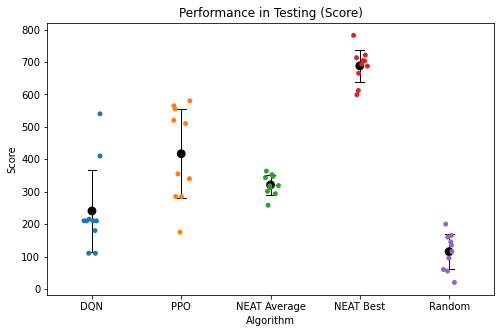

In [19]:
fig7, ax7 = plt.subplots(1, figsize = (8,5))
ax7 = sns.stripplot(x=tests_graph['Algorithm'], y=tests_graph['Score'], jitter=True)
ax7 = sns.pointplot(x=tests_graph['Algorithm'], y=tests_graph['Score'], join = False, ci='sd', capsize = 0.1, color = 'black', errwidth = 1)

ax7.set_title('Performance in Testing (Score)')
fig7.savefig('images/{0}.{1}'.format('performance_test',file_ext))

In [20]:
DQN_mean = np.mean(DQN_tests)
DQN_mean

240.5

In [21]:
PPO_mean = np.mean(PPO_tests)
PPO_mean

417.0

In [22]:
NEAT_avg_mean = np.mean(NEAT_avg_tests.tolist())
NEAT_avg_mean

320.87095328976693

In [23]:
NEAT_best_mean = np.mean(NEAT_best_tests.tolist())
NEAT_best_mean

687.9

In [24]:
random_mean = np.mean(random_agent_tests)
random_mean

115.0